In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial

%matplotlib inline

In [182]:
plt.rcParams['figure.figsize'] = (8,8)

In [183]:
df = pd.read_csv('draws.csv')

df = df.sort_values(['year', 'draw'], ascending=True)

df.reset_index(drop=True, inplace=True)

In [184]:
df['set'] = df.apply(lambda row: [row['N1'], row['N2'], row['N3'], row['N4'], row['N5'], row['N6']], axis=1)

In [185]:
df['sum'] = df[['N1', 'N2', 'N3', 'N4', 'N5', 'N6']].sum(axis=1)

In [186]:
df['cosine'] = np.nan
df['euclidean'] = np.nan
df['taxicab'] = np.nan

In [187]:
def cosine(a,b):
    return spatial.distance.cosine(a, b)

def euclidean(a,b):
    return np.sqrt(np.sum((np.array(a) - np.array(b))**2))

def taxicab(a,b):
    return np.sum((np.array(a) - np.array(b)))

def delta(a,b):
    return np.array(a) - np.array(b)

In [188]:
for i in range(1,len(df)):
    df.loc[i,'cosine'] = cosine(df.loc[i,'set'], df.loc[i-1, 'set'])
    df.loc[i,'euclidean'] = euclidean(df.loc[i,'set'], df.loc[i-1, 'set'])
    df.loc[i,'taxicab'] = taxicab(df.loc[i,'set'], df.loc[i-1, 'set'])

In [189]:
df.head()

,draw,N1,N2,N3,N4,N5,N6,year,set,sum,cosine,euclidean,taxicab
0,1,5,6,9,30,42,44,2007,"[5, 6, 9, 30, 42, 44]",136,NaN,NaN,NaN
1,2,8,10,14,27,28,29,2007,"[8, 10, 14, 27, 28, 29]",116,0.027721,21.908902,-20.0
2,3,21,34,39,44,45,46,2007,"[21, 34, 39, 44, 45, 46]",229,0.031933,47.296934,113.0
3,4,8,9,23,25,31,37,2007,"[8, 9, 23, 25, 31, 37]",133,0.036105,41.085277,-96.0
4,5,7,11,24,26,27,46,2007,"[7, 11, 24, 26, 27, 46]",141,0.009934,10.198039,8.0


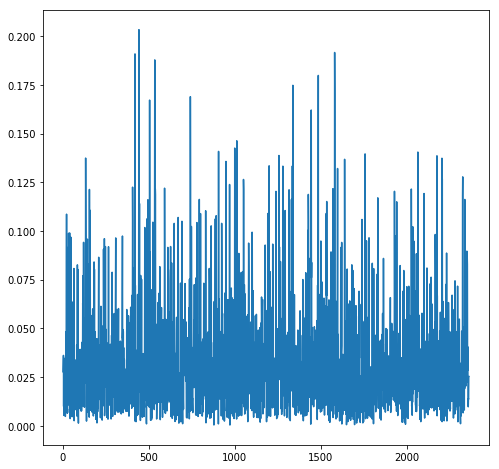

In [190]:
df['cosine'].plot()

In [200]:
hull = spatial.ConvexHull(df['set'].values.tolist())

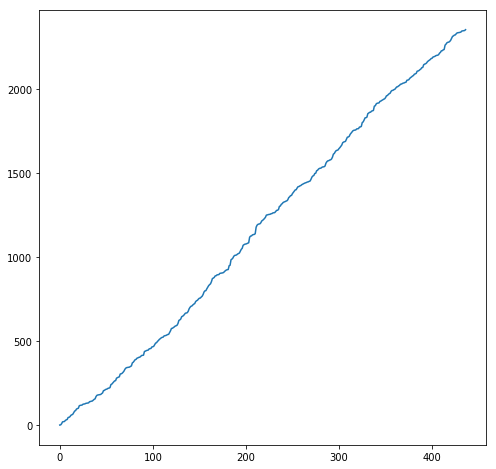

In [205]:
plt.plot(hull.vertices.tolist())

In [207]:
hull.volume

9184787.03611105

In [208]:
hull.vertices

array([   1,    2,    9,   20,   21,   22,   28,   32,   34,   46,   47,
         51,   59,   62,   65,   74,   84,   87,   96,   99,  101,  116,
        118,  119,  120,  125,  126,  127,  130,  131,  132,  133,  140,
        141,  143,  144,  149,  154,  157,  171,  178,  180,  181,  182,
        183,  188,  192,  206,  207,  212,  214,  216,  220,  221,  224,
        242,  245,  252,  258,  264,  265,  280,  283,  286,  288,  305,
        306,  309,  315,  322,  333,  340,  343,  344,  345,  346,  350,
        353,  371,  375,  383,  390,  392,  399,  401,  404,  405,  410,
        415,  416,  417,  439,  441,  444,  446,  447,  454,  456,  457,
        466,  467,  470,  480,  489,  491,  499,  504,  511,  515,  520,
        523,  524,  531,  533,  534,  537,  540,  541,  551,  562,  576,
        577,  581,  585,  590,  592,  595,  605,  624,  627,  632,  646,
        649,  653,  660,  667,  668,  670,  678,  693,  702,  708,  710,
        716,  721,  724,  736,  741,  744,  751,  7

In [212]:
df[df['euclidean']==df['euclidean'].min()]

,draw,N1,N2,N3,N4,N5,N6,year,set,sum,cosine,euclidean,taxicab
1992,190,5,9,20,25,34,40,2014,"[5, 9, 20, 25, 34, 40]",133,0.000795,2.828427,-4.0


In [213]:
df.loc[[1991,1992],:]

,draw,N1,N2,N3,N4,N5,N6,year,set,sum,cosine,euclidean,taxicab
1991,189,6,10,19,27,35,40,2014,"[6, 10, 19, 27, 35, 40]",137,0.054509,42.178193,-97.0
1992,190,5,9,20,25,34,40,2014,"[5, 9, 20, 25, 34, 40]",133,0.000795,2.828427,-4.0
